Tarea semanal 8

Punto 2

Filtros IIR

(4, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

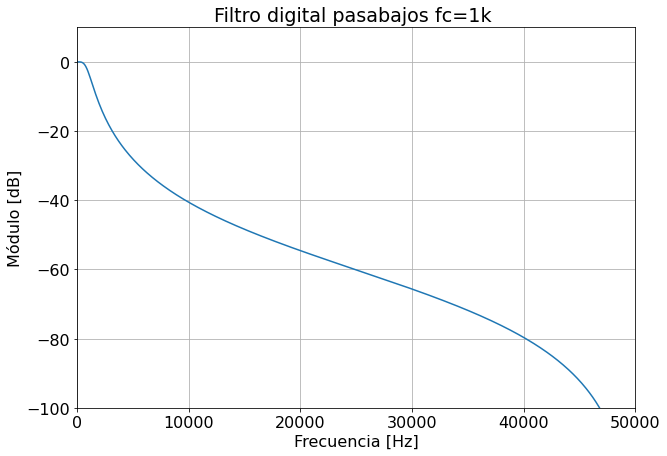

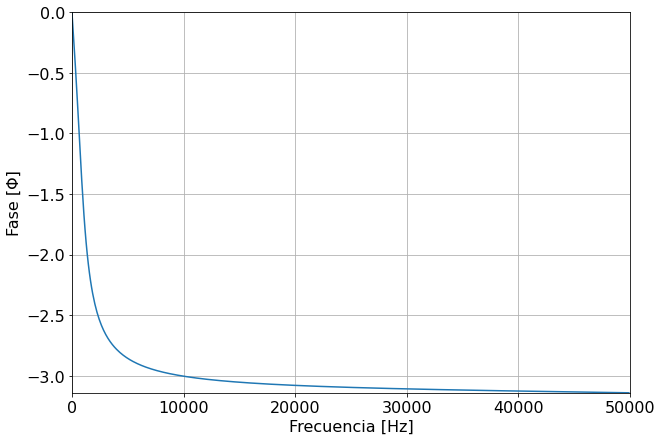

<Figure size 720x504 with 0 Axes>

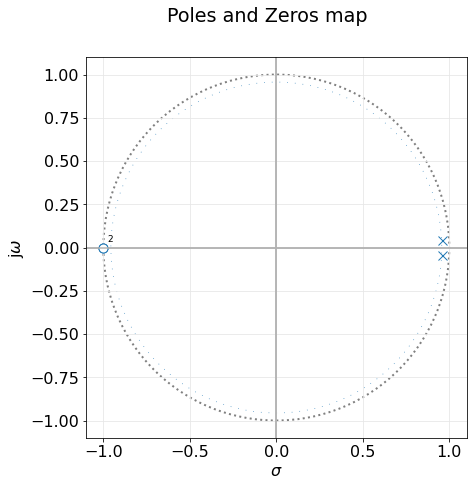

In [536]:
# Emular filtro analogico pasabajos butter de orden 2 y Fc = 1 Khz
# Fs = 100 KHz

# Inicialización e importación de módulos

# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Módulos importantantes
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from splane import plot_plantilla
from splane import pzmap

## Fig Config

fig_sz_x = 10
fig_sz_y = 7
fig_dpi = 100 # dpi

fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x,fig_sz_y)
plt.rcParams.update({'font.size':fig_font_size})

##
fc = 1000
fs = 100e3                                 # fs
nyq_frec = fs / 2                           # nyquist

wo = 2*np.pi*1000
Q = np.sqrt(2)/2

# defino num y den de H(S)
num_s = np.array([wo**2])
den_s = np.array([1, wo/Q, wo**2])

w_s, h_s = sig.freqs(num_s, den_s, worN=np.logspace(-1, 7, 1000))

# transformo a Z

num_z, den_z = sig.bilinear(num_s, den_s, fs = fs)

w_z, h_z = sig.freqz(num_z, den_z)

# w_z llega hasta pi, por lo que lo renormalizo para que llegue hasta nyquist
w_z = w_z / np.pi * nyq_frec

# Grafico el modulo
plt.plot(w_z, 20 * np.log10(abs(h_z)))

plt.title('Filtro digital pasabajos fc=1k ')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, fs/2, -100, 10 ])

# Grafico la fase
plt.figure()

plt.plot(w_z, np.angle(h_z) )

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [Φ]')
plt.grid()
plt.axis([0, fs/2, -np.pi, 0 ])

# Grafico polos y ceros
plt.figure()

my_df = sig.TransferFunction(num_z, den_z, dt=1/fs)
pzmap( my_df )

(5, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

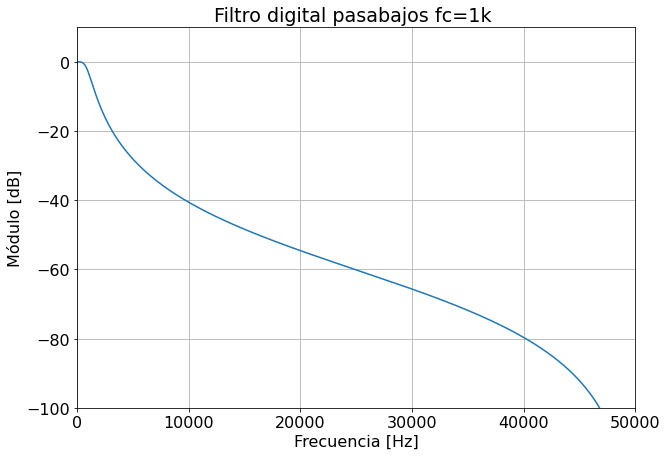

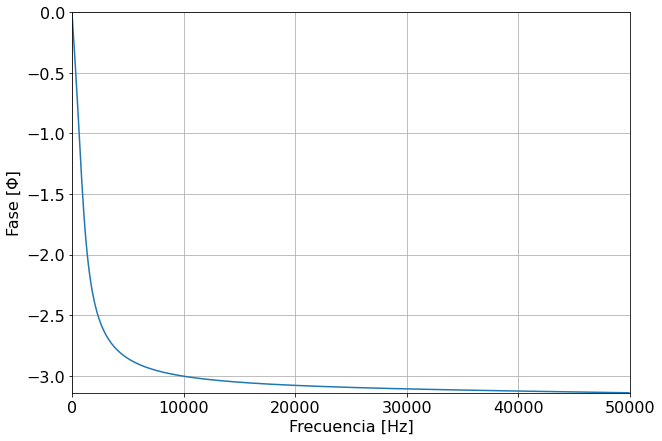

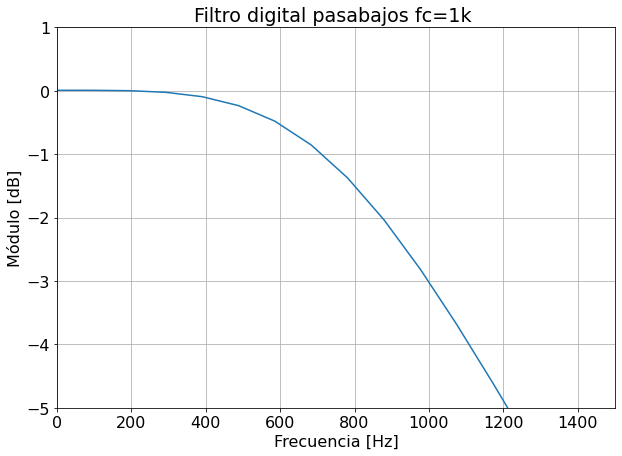

<Figure size 720x504 with 0 Axes>

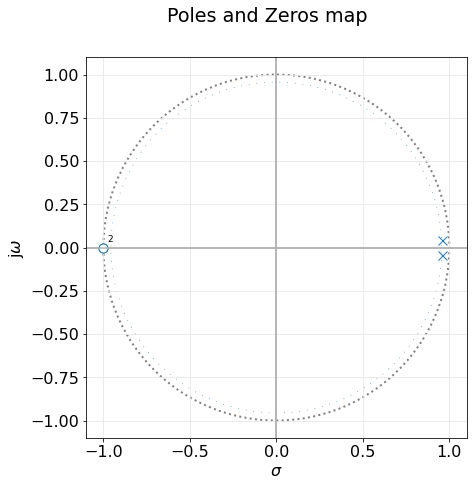

In [537]:
# Grafico en Z lo desarrollado con algebra sin computadora para corroborar el mismo resultado

##
fc = 1000
fs = 100000                                 # fs
nyq_frec = fs / 2                           # nyquist

b0 = 944.085e-6

num_z = np.array([b0 , 2*b0, b0 ])       # num
den_z = np.array([1, -1.9112266, 0.915])          # den

w_z, h_z = sig.freqz(num_z, den_z)

# w_z llega hasta pi, por lo que lo renormalizo para que llegue hasta nyquist
w_z = w_z / np.pi * nyq_frec

plt.plot(w_z, 20 * np.log10(abs(h_z)))

plt.title('Filtro digital pasabajos fc=1k ')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, fs/2, -100, 10 ])

# Grafico la fase
plt.figure()

plt.plot(w_z, np.angle(h_z) )

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [Φ]')
plt.grid()
plt.axis([0, fs/2, -np.pi, 0 ])

# Vuelvo a graficar en la zona cercana a Fc para verificar que en 1k hz hay -3dB

plt.figure()
plt.plot(w_z, 20 * np.log10(abs(h_z)))

plt.title('Filtro digital pasabajos fc=1k ')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, 1500, -5, 1 ])

# Grafico polos y ceros
plt.figure()

my_df = sig.TransferFunction(num_z, den_z, dt=1/fs)
pzmap( my_df )

(5, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

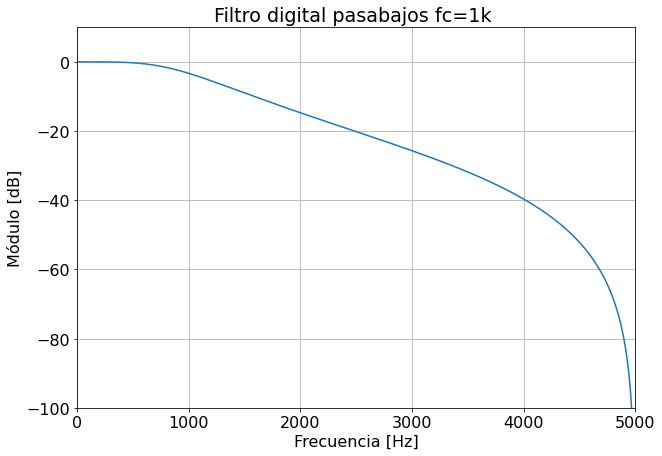

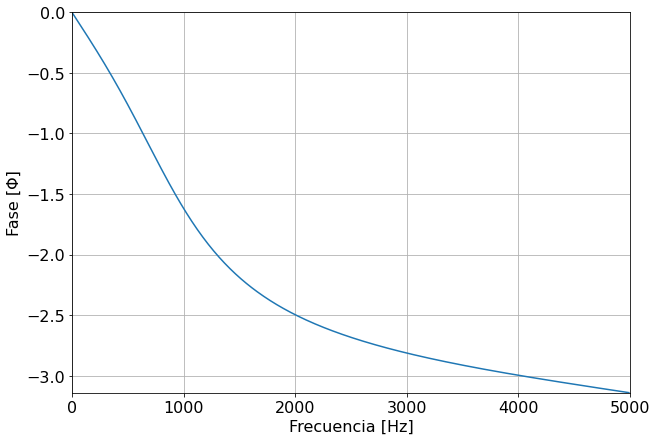

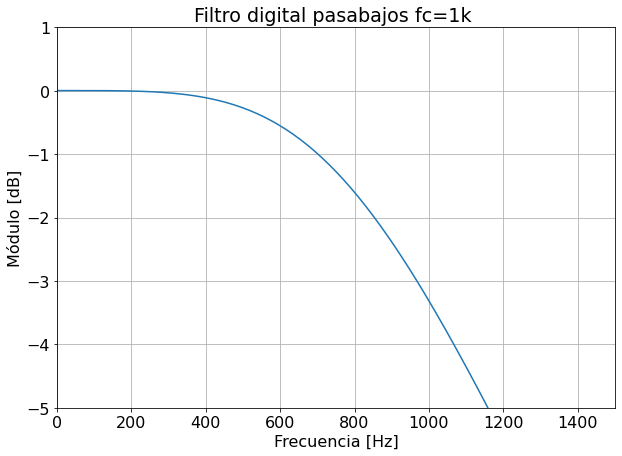

<Figure size 720x504 with 0 Axes>

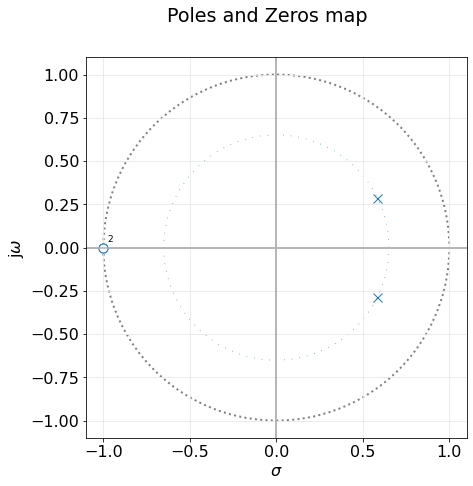

In [538]:
# Ahora con fs = 10k

fc = 1000
fs = 10000                                 # fs
nyq_frec = fs / 2                           # nyquist

b0 = 63.9644e-3

num_z = np.array([b0 , 2*b0, b0 ])       # num
den_z = np.array([1, -1.1683, 0.4241])          # den

w_z, h_z = sig.freqz(num_z, den_z)

# w_z llega hasta pi, por lo que lo renormalizo para que llegue hasta nyquist
w_z = w_z / np.pi * nyq_frec

plt.plot(w_z, 20 * np.log10(abs(h_z)))

plt.title('Filtro digital pasabajos fc=1k ')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, fs/2, -100, 10 ])

# Grafico la fase
plt.figure()

plt.plot(w_z, np.angle(h_z) )

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [Φ]')
plt.grid()
plt.axis([0, fs/2, -np.pi, 0 ])

# Vuelvo a graficar en la zona cercana a Fc para verificar que en 1k hz hay -3dB

plt.figure()
plt.plot(w_z, 20 * np.log10(abs(h_z)))

plt.title('Filtro digital pasabajos fc=1k ')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, 1500, -5, 1 ])

# puede haber una leve diferencia debido a los rendondeos en los calculos en papel.

# Grafico polos y ceros
plt.figure()

my_df = sig.TransferFunction(num_z, den_z, dt=1/fs)
pzmap( my_df )

(5, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

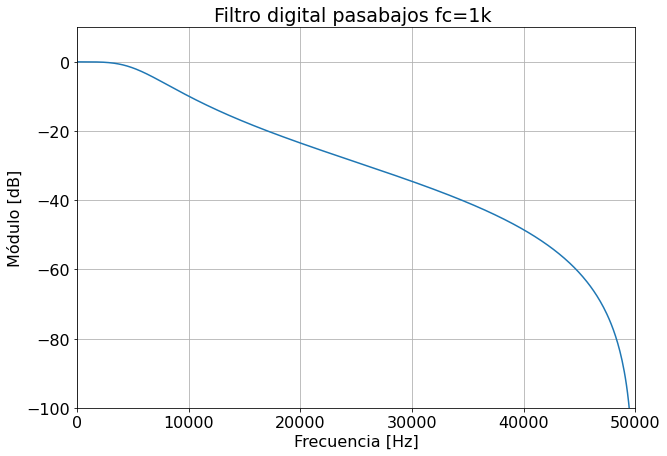

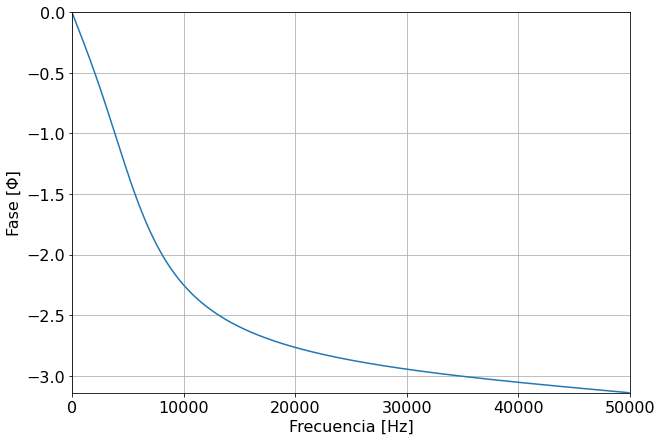

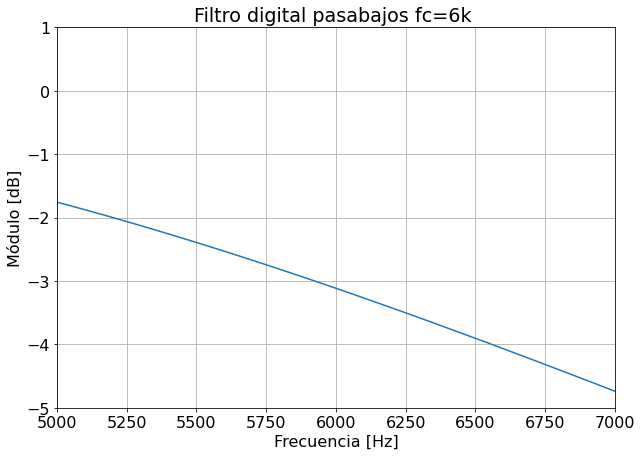

<Figure size 720x504 with 0 Axes>

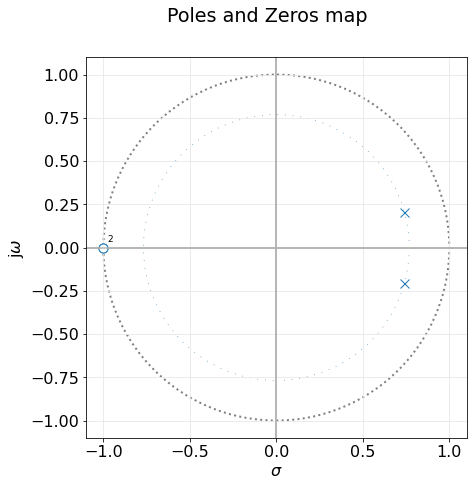

In [539]:
# C 
# 
# Fs = 100k    Fc = 6k

fc = 6000
fs = 100000                                 # fs
nyq_frec = fs / 2                           # nyquist

b0 = 27.287e-3

num_z = np.array([b0 , 2*b0, b0 ])       # num
den_z = np.array([1, -1.4814, 0.59055 ])          # den

w_z, h_z = sig.freqz(num_z, den_z)

# w_z llega hasta pi, por lo que lo renormalizo para que llegue hasta nyquist
w_z = w_z / np.pi * nyq_frec

plt.plot(w_z, 20 * np.log10(abs(h_z)))

plt.title('Filtro digital pasabajos fc=1k ')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, fs/2, -100, 10 ])

# Grafico la fase
plt.figure()

plt.plot(w_z, np.angle(h_z) )

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [Φ]')
plt.grid()
plt.axis([0, fs/2, -np.pi, 0 ])

# Vuelvo a graficar en la zona cercana a Fc para verificar que en 1k hz hay -3dB

plt.figure()
plt.plot(w_z, 20 * np.log10(abs(h_z)))

plt.title('Filtro digital pasabajos fc=6k ')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([5000, 7000, -5, 1 ])

# Grafico polos y ceros
plt.figure()

my_df = sig.TransferFunction(num_z, den_z, dt=1/fs)
pzmap( my_df )


(4, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

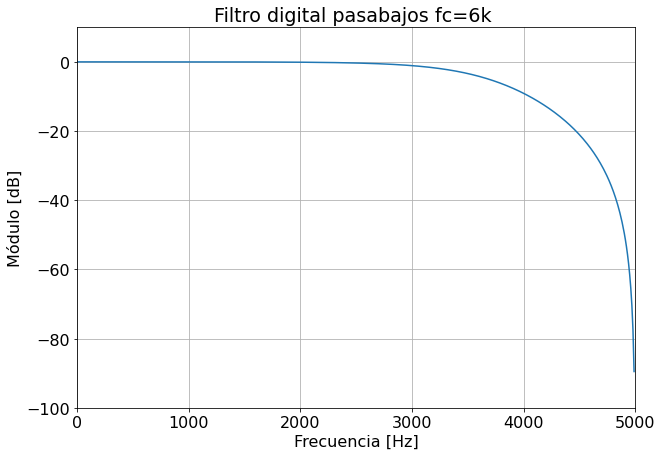

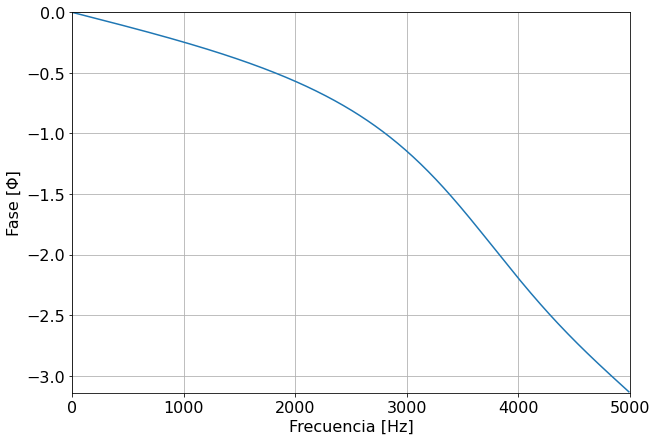

<Figure size 720x504 with 0 Axes>

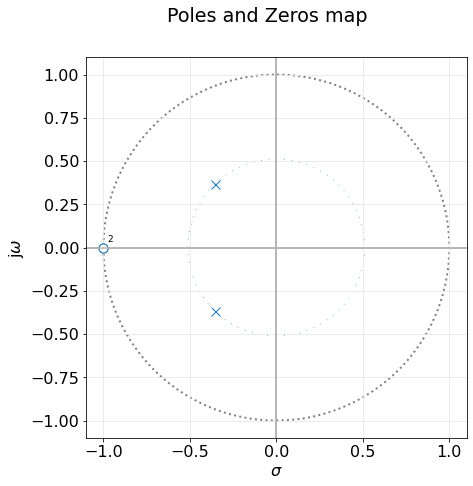

In [540]:
#C Fs = 10k    Fc = 6k
fc = 6000
fs = 10000                                 # fs
nyq_frec = fs / 2                           # nyquist

b0 = 492.196e-3

num_z = np.array([b0 , 2*b0, b0 ])       # num
den_z = np.array([1, 0.707337, 0.26145 ])          # den

w_z, h_z = sig.freqz(num_z, den_z)

# w_z llega hasta pi, por lo que lo renormalizo para que llegue hasta nyquist
w_z = w_z / np.pi * nyq_frec

plt.plot(w_z, 20 * np.log10(abs(h_z)))

plt.title('Filtro digital pasabajos fc=6k ')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, fs/2, -100, 10 ])

# En este caso no se cumple nyquist, la fs es menor al doble de la frecuencia maxima del sistema que se desea digitalizar
# Por este motivo el resultado no es correcto

# Grafico la fase
plt.figure()

plt.plot(w_z, np.angle(h_z) )

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [Φ]')
plt.grid()
plt.axis([0, fs/2, -np.pi, 0 ])

# Grafico polos y ceros
plt.figure()

my_df = sig.TransferFunction(num_z, den_z, dt=1/fs)
pzmap( my_df )



Ejercicio 3

Filtros FIR

(4, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

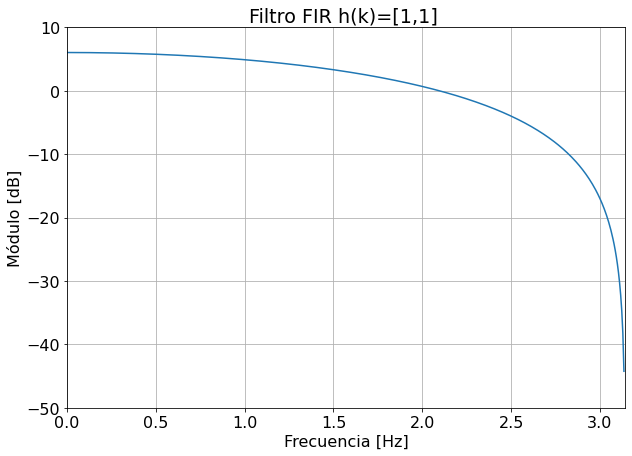

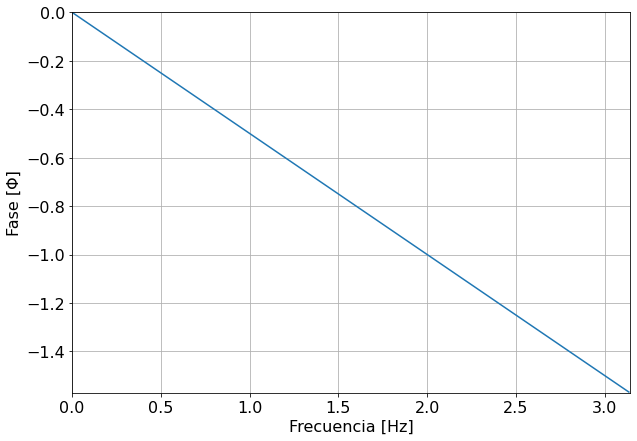

<Figure size 720x504 with 0 Axes>

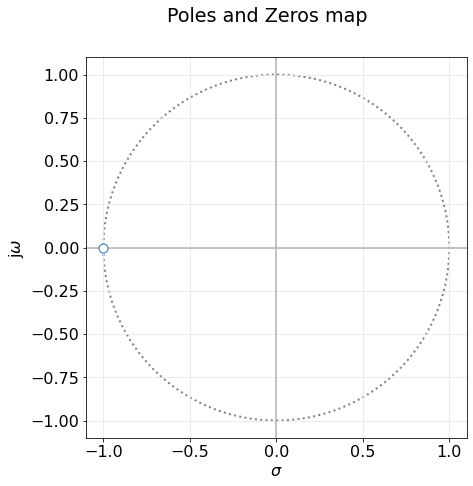

In [541]:
# punto a 1

## Fig Config

fig_sz_x = 10
fig_sz_y = 7
fig_dpi = 100 # dpi

fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x,fig_sz_y)
plt.rcParams.update({'font.size':fig_font_size})


num_z = np.array([1, 1])       # num
den_z = np.array([1])          # den

w_z, h_z = sig.freqz(num_z, den_z)

# w_z llega hasta pi, por lo que lo renormalizo para que llegue hasta nyquist
#w_z = w_z / np.pi * nyq_frec

plt.plot(w_z, 20 * np.log10(abs(h_z)))

plt.title('Filtro FIR h(k)=[1,1] ')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, np.pi, -50, 10 ])

# Grafico la fase
plt.figure()

plt.plot(w_z, np.angle(h_z) )

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [Φ]')
plt.grid()
plt.axis([0, np.pi, -np.pi/2, 0 ])

# Grafico polos y ceros
plt.figure()

my_df = sig.TransferFunction(num_z, den_z, dt=1/fs)
pzmap( my_df )



(4, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

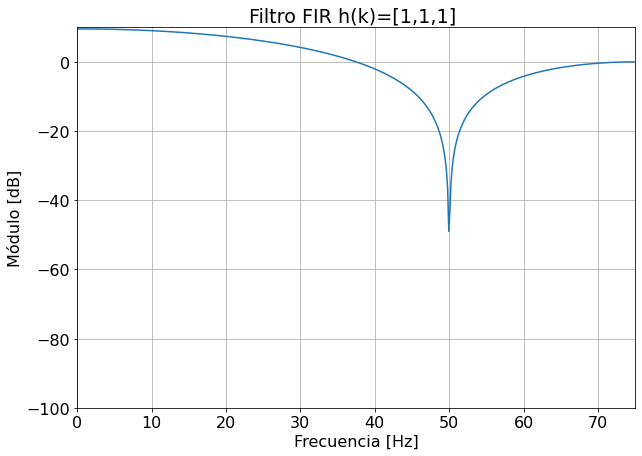

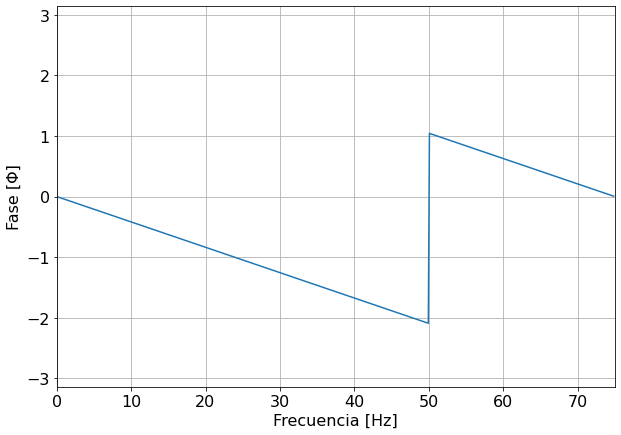

<Figure size 720x504 with 0 Axes>

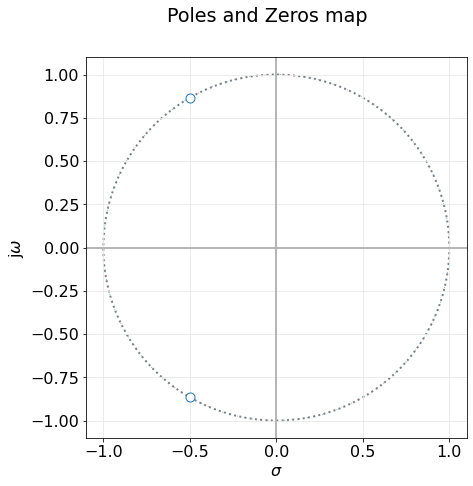

In [542]:
# punto a 2

num_z = np.array([1, 1, 1])       # num
den_z = np.array([1])          # den

w_z, h_z = sig.freqz(num_z, den_z)

fs = 150
nyq_frec = fs / 2

#w_z llega hasta pi, por lo que lo renormalizo para que llegue hasta nyquist
w_z = w_z / np.pi * nyq_frec

plt.plot(w_z, 20 * np.log10(abs(h_z)))

plt.title('Filtro FIR h(k)=[1,1,1] ')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, fs/2, -100, 10 ])

# Grafico la fase
plt.figure()

plt.plot(w_z, np.angle(h_z) )

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [Φ]')
plt.grid()
plt.axis([0, fs/2, -np.pi, np.pi ])

# Grafico polos y ceros
plt.figure()

my_df = sig.TransferFunction(num_z, den_z, dt=1/fs)
pzmap( my_df )


(4, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

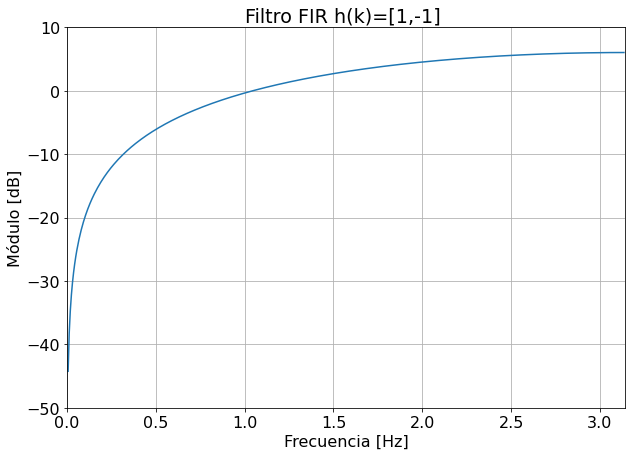

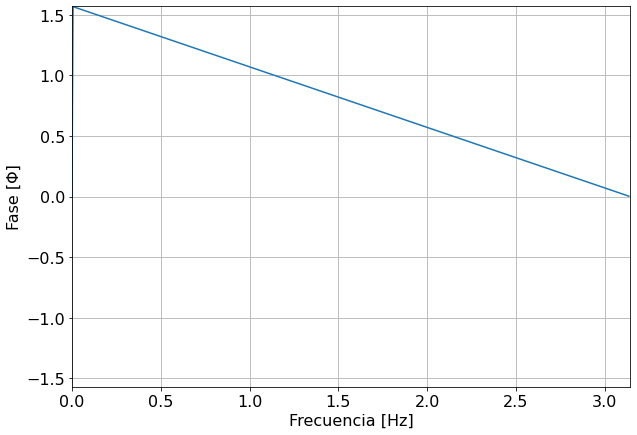

<Figure size 720x504 with 0 Axes>

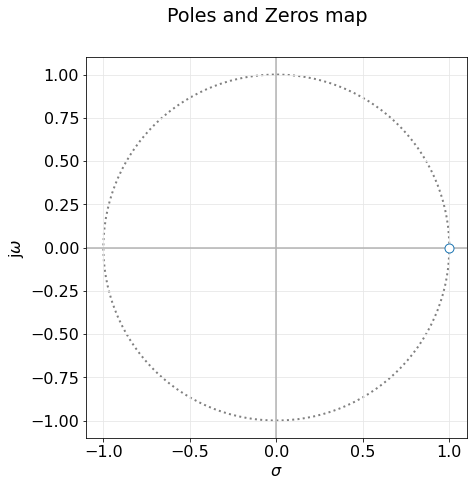

In [543]:
# punto b 1

num_z = np.array([1, -1])       # num
den_z = np.array([1])          # den

w_z, h_z = sig.freqz(num_z, den_z)

# w_z llega hasta pi, por lo que lo renormalizo para que llegue hasta nyquist
#w_z = w_z / np.pi * nyq_frec

plt.plot(w_z, 20 * np.log10(abs(h_z)))

plt.title('Filtro FIR h(k)=[1,-1] ')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, np.pi, -50, 10 ])

# Grafico la fase
plt.figure()

plt.plot(w_z, np.angle(h_z) )

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [Φ]')
plt.grid()
plt.axis([0, np.pi, -np.pi/2, np.pi/2 ])

# Grafico polos y ceros
plt.figure()

my_df = sig.TransferFunction(num_z, den_z, dt=1/fs)
pzmap( my_df )


(4, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

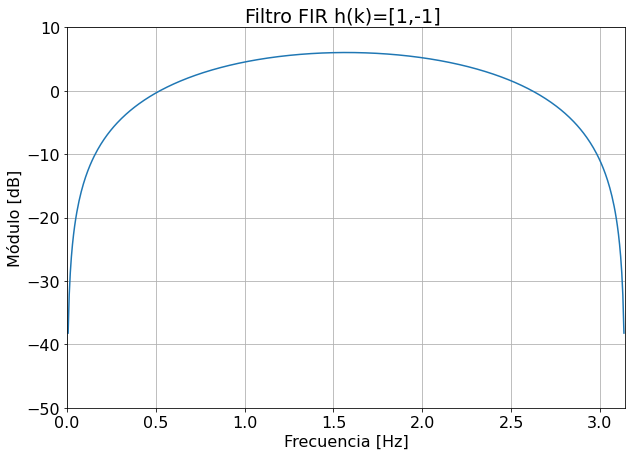

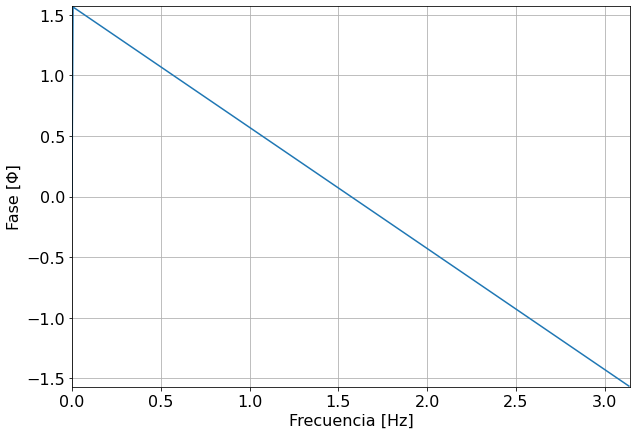

<Figure size 720x504 with 0 Axes>

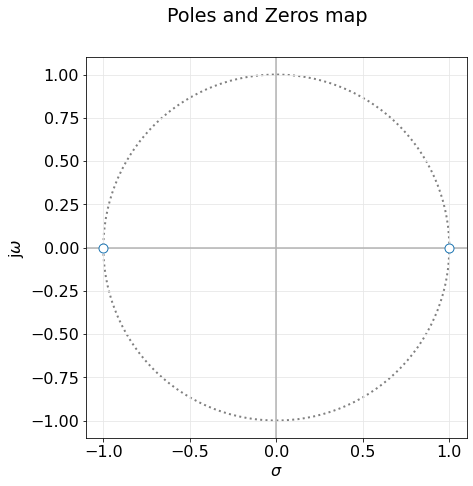

In [544]:
# punto b 2

from splane import pzmap


num_z = np.array([1, 0, -1])       # num
den_z = np.array([1])          # den

w_z, h_z = sig.freqz(num_z, den_z)

# w_z llega hasta pi, por lo que lo renormalizo para que llegue hasta nyquist
#w_z = w_z / np.pi * nyq_frec

plt.plot(w_z, 20 * np.log10(abs(h_z)))

plt.title('Filtro FIR h(k)=[1,-1] ')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, np.pi, -50, 10 ])

# Grafico la fase
plt.figure()

plt.plot(w_z, np.angle(h_z) )

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [Φ]')
plt.grid()
plt.axis([0, np.pi, -np.pi/2, np.pi/2 ])

# Grafico polos y ceros
plt.figure()

my_df = sig.TransferFunction(num_z, den_z, dt=1/fs)
pzmap( my_df )

